## Plot by Demographics

Inspired by https://arxiv.org/abs/2410.19599

In [1]:
import pandas as pd 

In [2]:
#Dsim = pd.read_csv("similarity_calculations_LLama_150.csv")

Dsim = pd.read_csv("similarity_calculations_4o_all_sbert_all-mpnet-base-v2.csv")

Dsim.head()

,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,0,0,all_4.jsonl,Text_SubjectiveLit,0.146102,I feel fairly confident in my ability to obtai...,Life is great and we all must pick what we wan...
1,1,0,all_4.jsonl,Text_Anxiety,0.489447,"When I visit the doctor's office, I sometimes ...",How doctors decide to take care of uses and pr...
2,2,0,all_4.jsonl,Text_Numeracy,0.104984,"Sure, there was a time when a close friend was...",The girl I'm engaged to has health problems at...
3,3,0,all_4.jsonl,Text_TrustPhys,0.546169,I generally trust my primary care physician be...,Doctors and nurses ppl must have full trust in...
4,4,0,conditioning_on_all.jsonl,Text_SubjectiveLit,0.142502,I feel quite confident in my ability to obtain...,Life is great and we all must pick what we wan...


In [3]:
from utils import *
EXPERIMENT_TYPE = 'Demographic + Behavioral + Psychological'
file_path = 'Data/Data_SurveyPlusDemographics.txt'
data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

# Data preprocess
data, psychological_list = convert_to_natural_language(data)
data, fipi_columns = split_fipi_responses(data)
data.drop(columns=['FIPI_response'], inplace=True, errors='ignore')
psychological_list.extend(fipi_columns)


train_data = select_experiment_data(data, EXPERIMENT_TYPE)
train_data = process_data_based_on_experiment(train_data, EXPERIMENT_TYPE)

# add labels column
label_columns = ['Text_SubjectiveLit', 'Text_Anxiety', 'Text_Numeracy', 'Text_TrustPhys']
train_data = pd.concat([train_data, data[label_columns]], axis=1)

/tmp/ipykernel_1792600/1438049294.py:4: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
/afs/crc.nd.edu/user/j/jlalor1/code/psych-agent-llm/utils.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(clean_numeric)
/afs/crc.nd.edu/user/j/jlalor1/code/psych-agent-llm/utils.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(clean_

In [4]:
train_data.head()

,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,HC_1,HC_2,...,HC_5,FIPI_1_response,FIPI_2_response,FIPI_3_response,FIPI_4_response,FIPI_5_response,Text_SubjectiveLit,Text_Anxiety,Text_Numeracy,Text_TrustPhys
0,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,Agree,Agree,...,Neutral,You disagree that you are extraverted and enth...,You strongly agree that you are agreeable and ...,You strongly agree that you are dependable and...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,I believe that I understand most of what my he...,"With some health care providers in the past, I...",A friend had been given antibiotic eye drops f...,"She never seems rushed with me, and she will a..."
1,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,Agree,Agree,...,Agree,You unknown that you are extraverted and enthu...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You strongly agree that you are emotionally st...,You agree that you are open to experience and ...,I feel like I can understand 90% of what is be...,I worry that I won't get the full attention of...,Just normal doctor visits and testing. not wo...,"My doctor wants to give his all, but the time ..."
2,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,Neutral,Neutral,...,Neutral,You strongly agree that you are extraverted an...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,I feel that while I am not a health expert I d...,I do not like to wait for test results to say ...,I tried to use my math skills the best that I ...,I like that the dr takes the time to listen an...
3,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,Neutral,Neutral,...,Neutral,You disagree that you are extraverted and enth...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You agree that you are emotionally stable and ...,You unknown that you are open to experience an...,I feel fairly confident that when I see medica...,The thing that makes me most anxious is wonder...,"I studied athletic training in college, and I'...","Typically when I see a doctor, they are a medi..."
4,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,Agree,Agree,...,Neutral,You disagree that you are extraverted and enth...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You agree that you are emotionally stable and ...,You unknown that you are open to experience an...,"I am okay with it for the most part, but I of...",I just get nervous having to sit in doctor's o...,Every time I researched my symptoms myself and...,I trust my doctor because he is highly trained...


In [5]:
train_data

,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,HC_1,HC_2,...,HC_5,FIPI_1_response,FIPI_2_response,FIPI_3_response,FIPI_4_response,FIPI_5_response,Text_SubjectiveLit,Text_Anxiety,Text_Numeracy,Text_TrustPhys
0,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,Agree,Agree,...,Neutral,You disagree that you are extraverted and enth...,You strongly agree that you are agreeable and ...,You strongly agree that you are dependable and...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,I believe that I understand most of what my he...,"With some health care providers in the past, I...",A friend had been given antibiotic eye drops f...,"She never seems rushed with me, and she will a..."
1,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,Agree,Agree,...,Agree,You unknown that you are extraverted and enthu...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You strongly agree that you are emotionally st...,You agree that you are open to experience and ...,I feel like I can understand 90% of what is be...,I worry that I won't get the full attention of...,Just normal doctor visits and testing. not wo...,"My doctor wants to give his all, but the time ..."
2,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,Neutral,Neutral,...,Neutral,You strongly agree that you are extraverted an...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,I feel that while I am not a health expert I d...,I do not like to wait for test results to say ...,I tried to use my math skills the best that I ...,I like that the dr takes the time to listen an...
3,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,Neutral,Neutral,...,Neutral,You disagree that you are extraverted and enth...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You agree that you are emotionally stable and ...,You unknown that you are open to experience an...,I feel fairly confident that when I see medica...,The thing that makes me most anxious is wonder...,"I studied athletic training in college, and I'...","Typically when I see a doctor, they are a medi..."
4,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,Agree,Agree,...,Neutral,You disagree that you are extraverted and enth...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You agree that you are emotionally stable and ...,You unknown that you are open to experience an...,"I am okay with it for the most part, but I of...",I just get nervous having to sit in doctor's o...,Every time I researched my symptoms myself and...,I trust my doctor because he is highly trained...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497,42.0,2.0,2.0,5.0,3.0,1.0,25.0,100.0,Agree,Agree,...,Neutral,You unknown that you are extraverted and enthu...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You strongly agree that you are emotionally st...,You unknown that you are open to experience an...,I am completely capable to obtain process and ...,I don't worry or feel especially anxious When ...,I had a mammogram and followed up with an ultr...,My doctor has always been proactive in my care...
8498,2.0,2.0,2.0,4.0,1.0,1.0,34.0,247.0,Agree,Agree,...,Agree,You unknown that you are extraverted and enthu...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,Yes. I am currently a nursing student. There h...,Nothing makes me anxious or nervous. Of course...,I attend nursing school. I am currently enroll...,I distrust my primary care physician because a...
8499,50.0,1.0,1.0,5.0,6.0,1.0,39.0,330.0,Agree,Agree,...,Agree,You unknown that you are extraverted and enthu...,You unknown that you are agreeable and kind

In [6]:
train_data.columns

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'Dmed_7', 'Dmed_8', 'HC_1', 'HC_2',
       'HC_3', 'HC_4', 'HC_5', 'FIPI_1_response', 'FIPI_2_response',
       'FIPI_3_response', 'FIPI_4_response', 'FIPI_5_response',
       'Text_SubjectiveLit', 'Text_Anxiety', 'Text_Numeracy',
       'Text_TrustPhys'],
      dtype='object')

In [7]:
Dtrain = train_data[["D1", "D2","D3","D4","D5","D6","Dmed_7","Dmed_8","Text_SubjectiveLit", "Text_Anxiety", "Text_Numeracy","Text_TrustPhys"]]
Dtrain["id"] = Dtrain.index

Dtrain.head()

/tmp/ipykernel_1792600/3733813787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dtrain["id"] = Dtrain.index


,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_SubjectiveLit,Text_Anxiety,Text_Numeracy,Text_TrustPhys,id
0,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...,"With some health care providers in the past, I...",A friend had been given antibiotic eye drops f...,"She never seems rushed with me, and she will a...",0
1,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,I feel like I can understand 90% of what is be...,I worry that I won't get the full attention of...,Just normal doctor visits and testing. not wo...,"My doctor wants to give his all, but the time ...",1
2,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,I feel that while I am not a health expert I d...,I do not like to wait for test results to say ...,I tried to use my math skills the best that I ...,I like that the dr takes the time to listen an...,2
3,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,I feel fairly confident that when I see medica...,The thing that makes me most anxious is wonder...,"I studied athletic training in college, and I'...","Typically when I see a doctor, they are a medi...",3
4,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,"I am okay with it for the most part, but I of...",I just get nervous having to sit in doctor's o...,Every time I researched my symptoms myself and...,I trust my doctor because he is highly trained...,4


In [8]:
Dtrainlong = pd.wide_to_long(Dtrain, "Text_", i="id", j="topic", suffix="\D+").reset_index()

Dtrainlong["topic"] = "Text_" + Dtrainlong["topic"].astype(str)

In [9]:
Dtrainlong.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_
0,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...
1,1,Text_SubjectiveLit,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,I feel like I can understand 90% of what is be...
2,2,Text_SubjectiveLit,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,I feel that while I am not a health expert I d...
3,3,Text_SubjectiveLit,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,I feel fairly confident that when I see medica...
4,4,Text_SubjectiveLit,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,"I am okay with it for the most part, but I of..."


In [10]:
Dsim.head()

,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,0,0,all_4.jsonl,Text_SubjectiveLit,0.146102,I feel fairly confident in my ability to obtai...,Life is great and we all must pick what we wan...
1,1,0,all_4.jsonl,Text_Anxiety,0.489447,"When I visit the doctor's office, I sometimes ...",How doctors decide to take care of uses and pr...
2,2,0,all_4.jsonl,Text_Numeracy,0.104984,"Sure, there was a time when a close friend was...",The girl I'm engaged to has health problems at...
3,3,0,all_4.jsonl,Text_TrustPhys,0.546169,I generally trust my primary care physician be...,Doctors and nurses ppl must have full trust in...
4,4,0,conditioning_on_all.jsonl,Text_SubjectiveLit,0.142502,I feel quite confident in my ability to obtain...,Life is great and we all must pick what we wan...


In [11]:
D = Dtrainlong.merge(Dsim, left_on=["topic","Text_"], right_on=["Question","True Label"])

D.head()


,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...,63360,1980,all_4.jsonl,Text_SubjectiveLit,0.752258,I feel quite capable of obtaining and understa...,I believe that I understand most of what my he...
1,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...,63364,1980,conditioning_on_all.jsonl,Text_SubjectiveLit,0.639786,I feel quite confident in my ability to obtain...,I believe that I understand most of what my he...
2,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...,63368,1980,holdout_Text_Anxiety.jsonl,Text_SubjectiveLit,0.697282,I feel quite confident in my ability to obtain...,I believe that I understand most of what my he...
3,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...,63372,1980,holdout_Text_Numeracy.jsonl,Text_SubjectiveLit,0.740881,I feel fairly confident in my ability to obtai...,I believe that I understand most of what my he...
4,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...,63376,1980,holdout_Text_SubjectiveLit.jsonl,Text_SubjectiveLit,0.712256,I feel quite capable when it comes to obtainin...,I believe that I understand most of what my he...


In [12]:
# Set up the demographics based on our paper
#D["Age_bin"] = (D["D1"] <= 38).astype(int)
D["Age"] = (D["D1"] <= 32).astype(int)

D["Gender"] = (D["D2"] == 1).astype(int)
D["Race"] = (D["D3"] == 1).astype(int)
D["Education"] = (D["D4"] >= 5).astype(int)
D["Income"] = (D["D5"] >= 4).astype(int)

D.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,...,Condition,Question,Similarity,Generated Response,True Label,Age,Gender,Race,Education,Income
0,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,all_4.jsonl,Text_SubjectiveLit,0.752258,I feel quite capable of obtaining and understa...,I believe that I understand most of what my he...,1,0,1,1,0
1,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,conditioning_on_all.jsonl,Text_SubjectiveLit,0.639786,I feel quite confident in my ability to obtain...,I believe that I understand most of what my he...,1,0,1,1,0
2,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,holdout_Text_Anxiety.jsonl,Text_SubjectiveLit,0.697282,I feel quite confident in my ability to obtain...,I believe that I understand most of what my he...,1,0,1,1,0
3,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,holdout_Text_Numeracy.jsonl,Text_SubjectiveLit,0.740881,I feel fairly confident in my ability to obtai...,I believe that I understand most of what my he...,1,0,1,1,0
4,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,holdout_Text_SubjectiveLit.jsonl,Text_SubjectiveLit,0.712256,I feel quite capable when it comes to obtainin...,I believe that I understand most of what my he...,1,0,1,1,0


In [13]:
D["Condition"] = D["Condition"].str.replace("json_datasets_200/", "")
D["Condition"] = D["Condition"].str.replace(".jsonl", "")
D["Condition"] = D["Condition"].str.replace("_Text_Anxiety", "")
D["Condition"] = D["Condition"].str.replace("_Text_Numeracy", "")
D["Condition"] = D["Condition"].str.replace("_Text_SubjectiveLit", "")
D["Condition"] = D["Condition"].str.replace("_Text_TrustPhys", "")
D.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,...,Condition,Question,Similarity,Generated Response,True Label,Age,Gender,Race,Education,Income
0,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,all_4,Text_SubjectiveLit,0.752258,I feel quite capable of obtaining and understa...,I believe that I understand most of what my he...,1,0,1,1,0
1,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,conditioning_on_all,Text_SubjectiveLit,0.639786,I feel quite confident in my ability to obtain...,I believe that I understand most of what my he...,1,0,1,1,0
2,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,holdout,Text_SubjectiveLit,0.697282,I feel quite confident in my ability to obtain...,I believe that I understand most of what my he...,1,0,1,1,0
3,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,holdout,Text_SubjectiveLit,0.740881,I feel fairly confident in my ability to obtai...,I believe that I understand most of what my he...,1,0,1,1,0
4,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,...,holdout,Text_SubjectiveLit,0.712256,I feel quite capable when it comes to obtainin...,I believe that I understand most of what my he...,1,0,1,1,0


In [14]:
D.Age.describe()

count    266768.000000
mean          0.709950
std           0.453786
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Age, dtype: float64

## Full Dataset Plots - 12/9/2024



## Older plots - pre 12/9/2024 with a subset of the data

/tmp/ipykernel_1792600/38093062.py:18: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Race', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


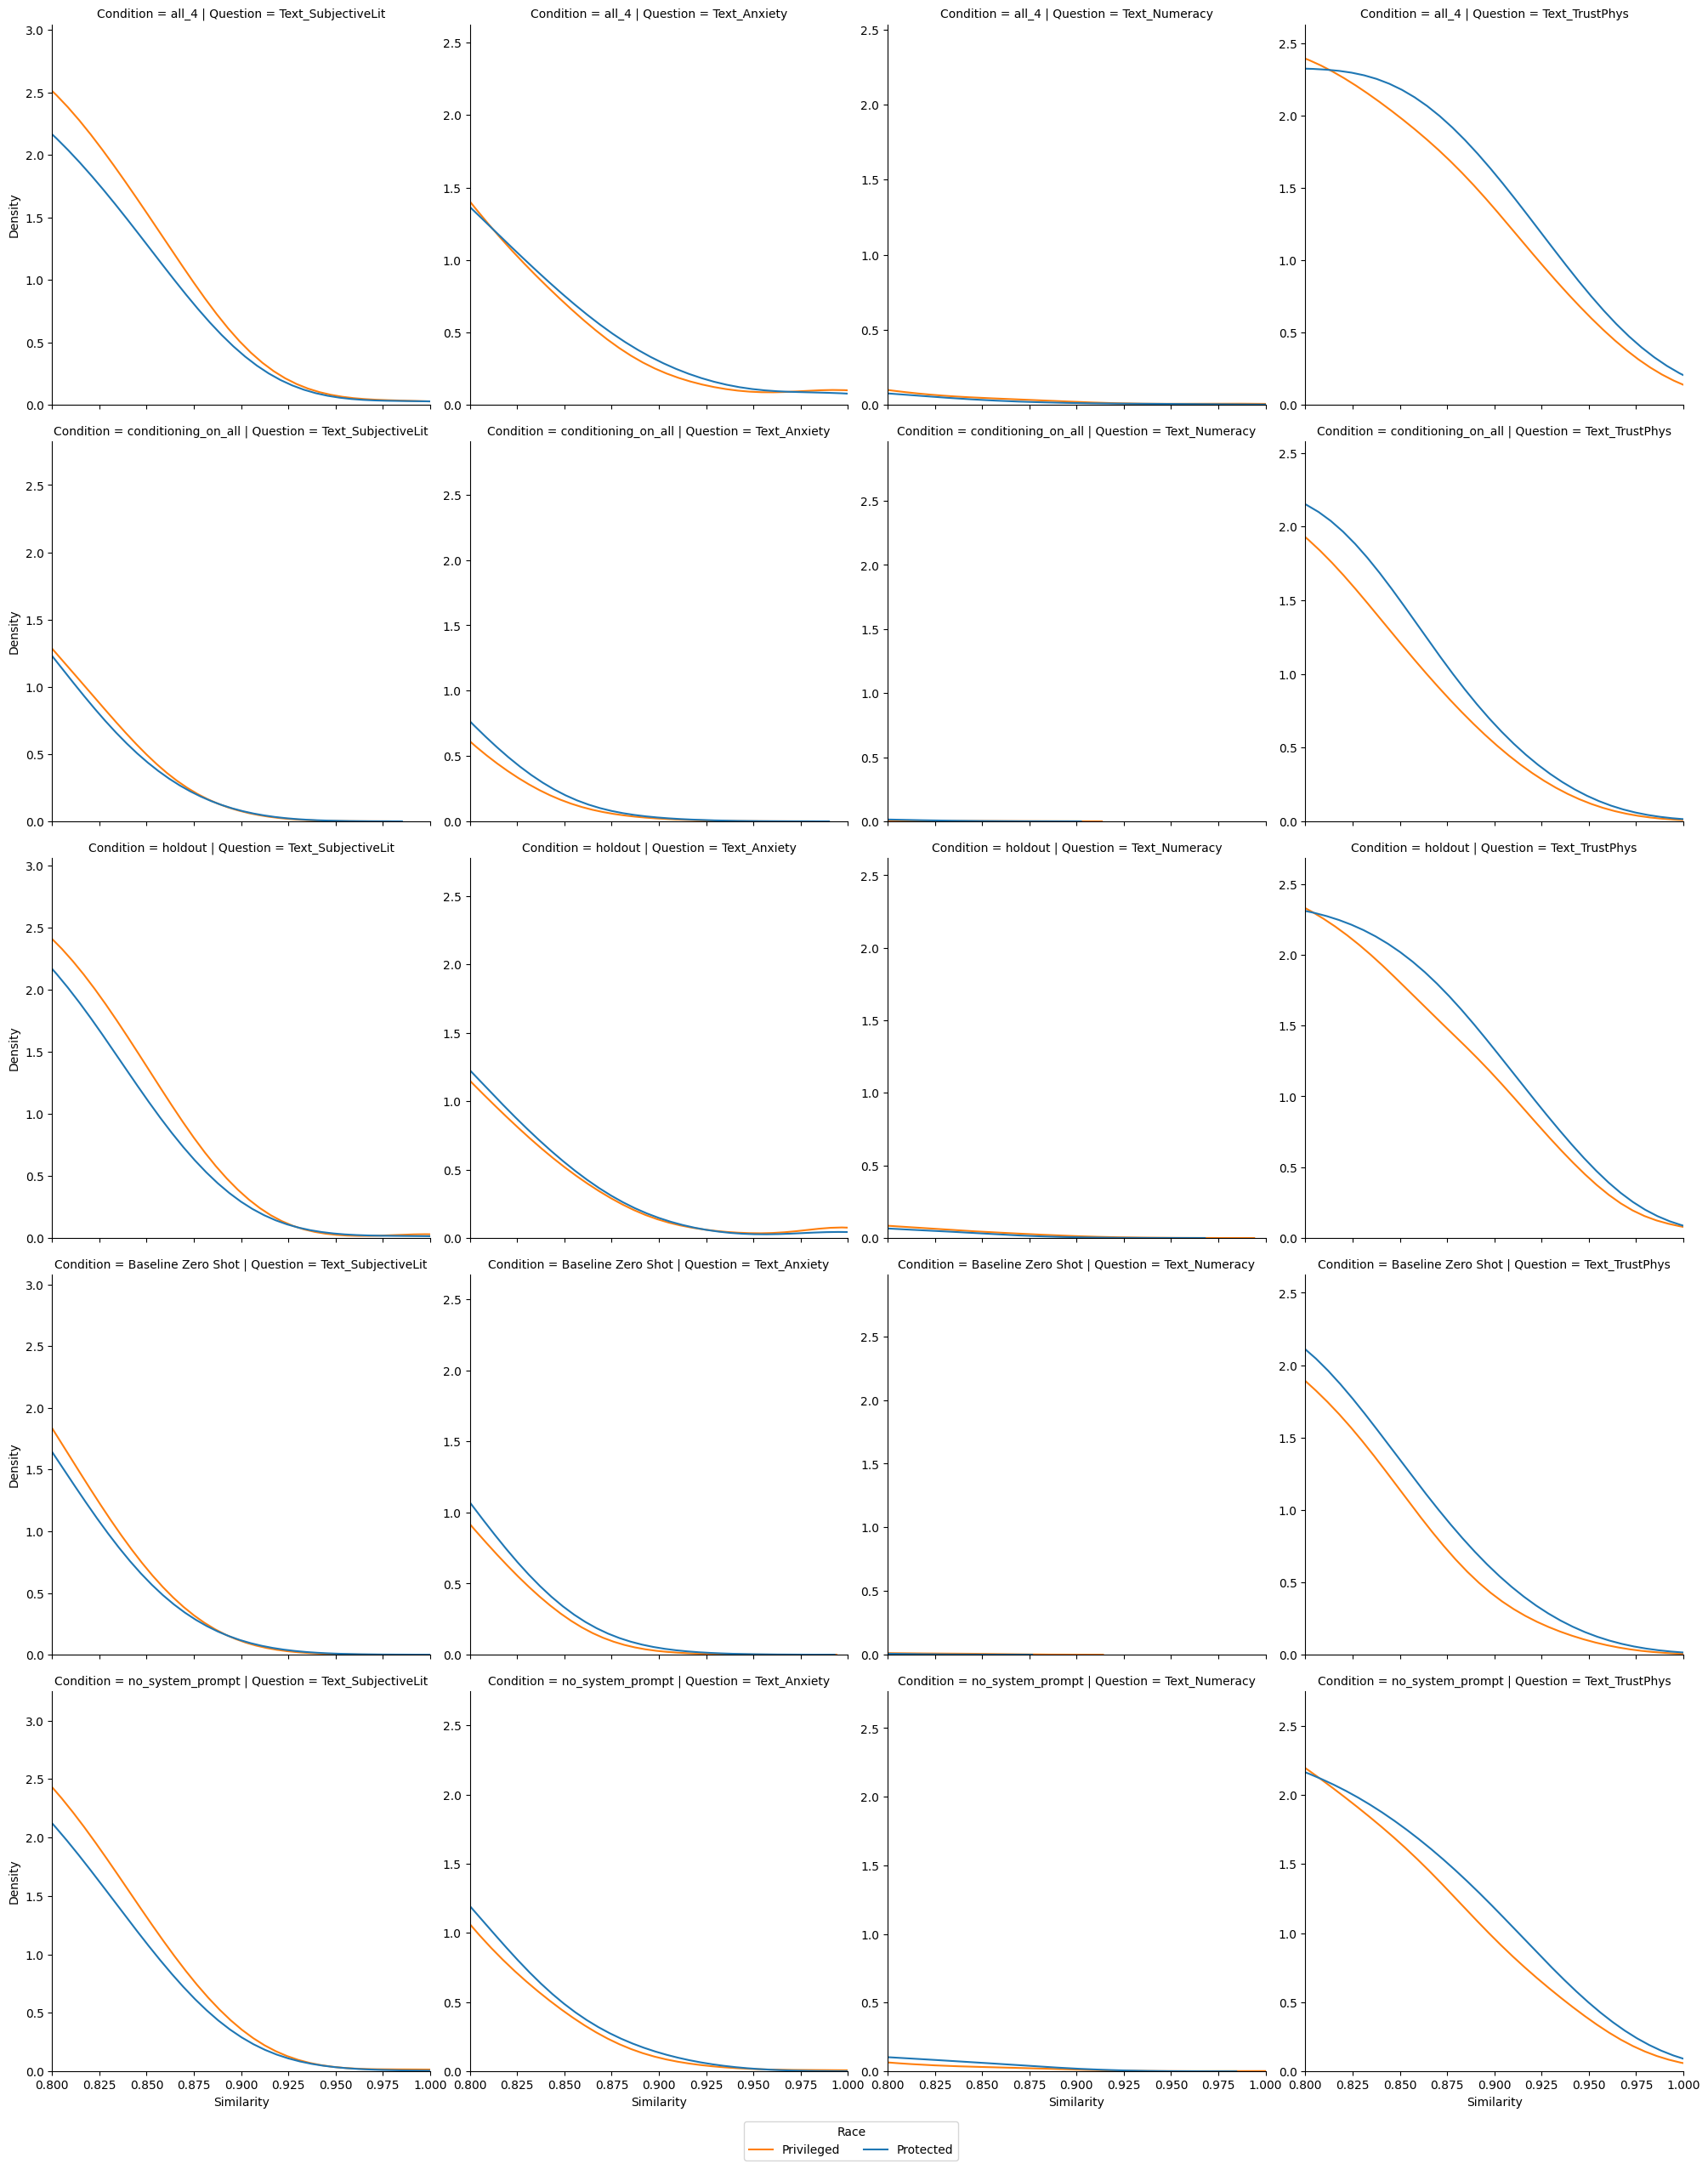

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.displot(
    D, x="Similarity", hue="Race", col="Question", 
    row="Condition", kind="kde", #bins=100, 
    #stat="probability", 
    multiple='layer', #shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Race', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)




/tmp/ipykernel_1787036/1768044388.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Age', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


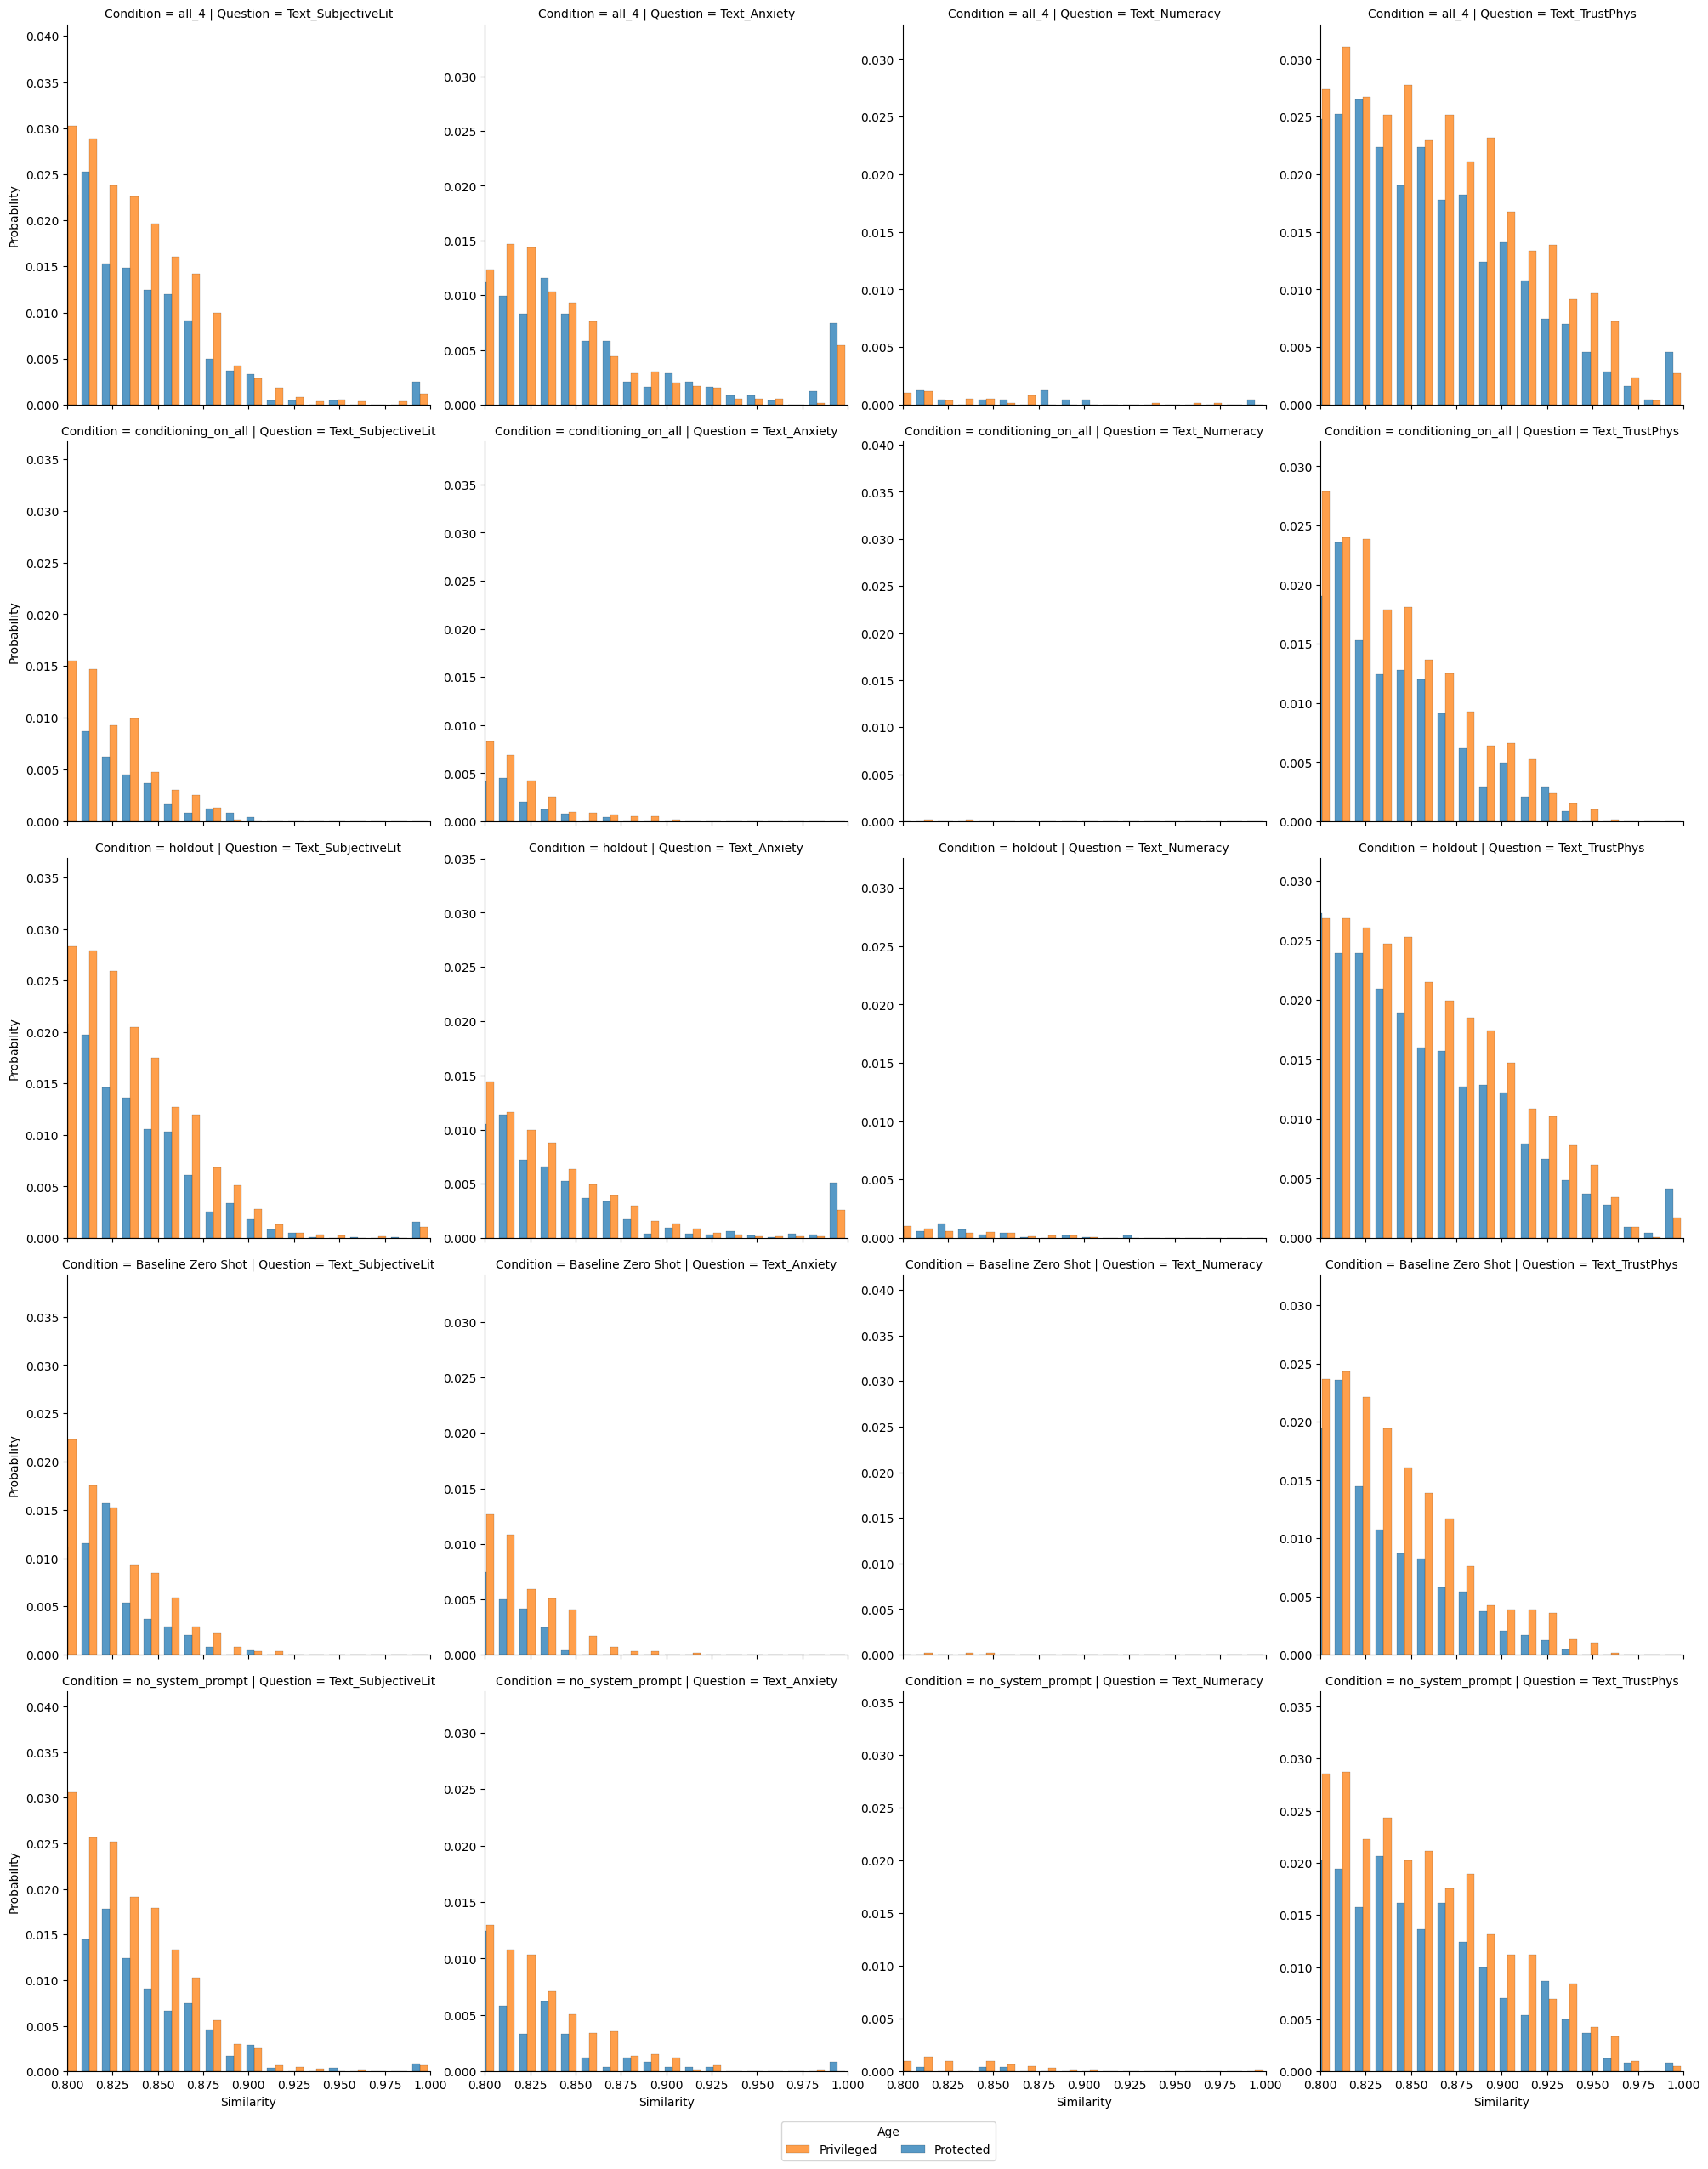

In [17]:

sns.displot(
    D, x="Similarity", hue="Age", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Age', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


/tmp/ipykernel_1787036/3887088780.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Gender', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


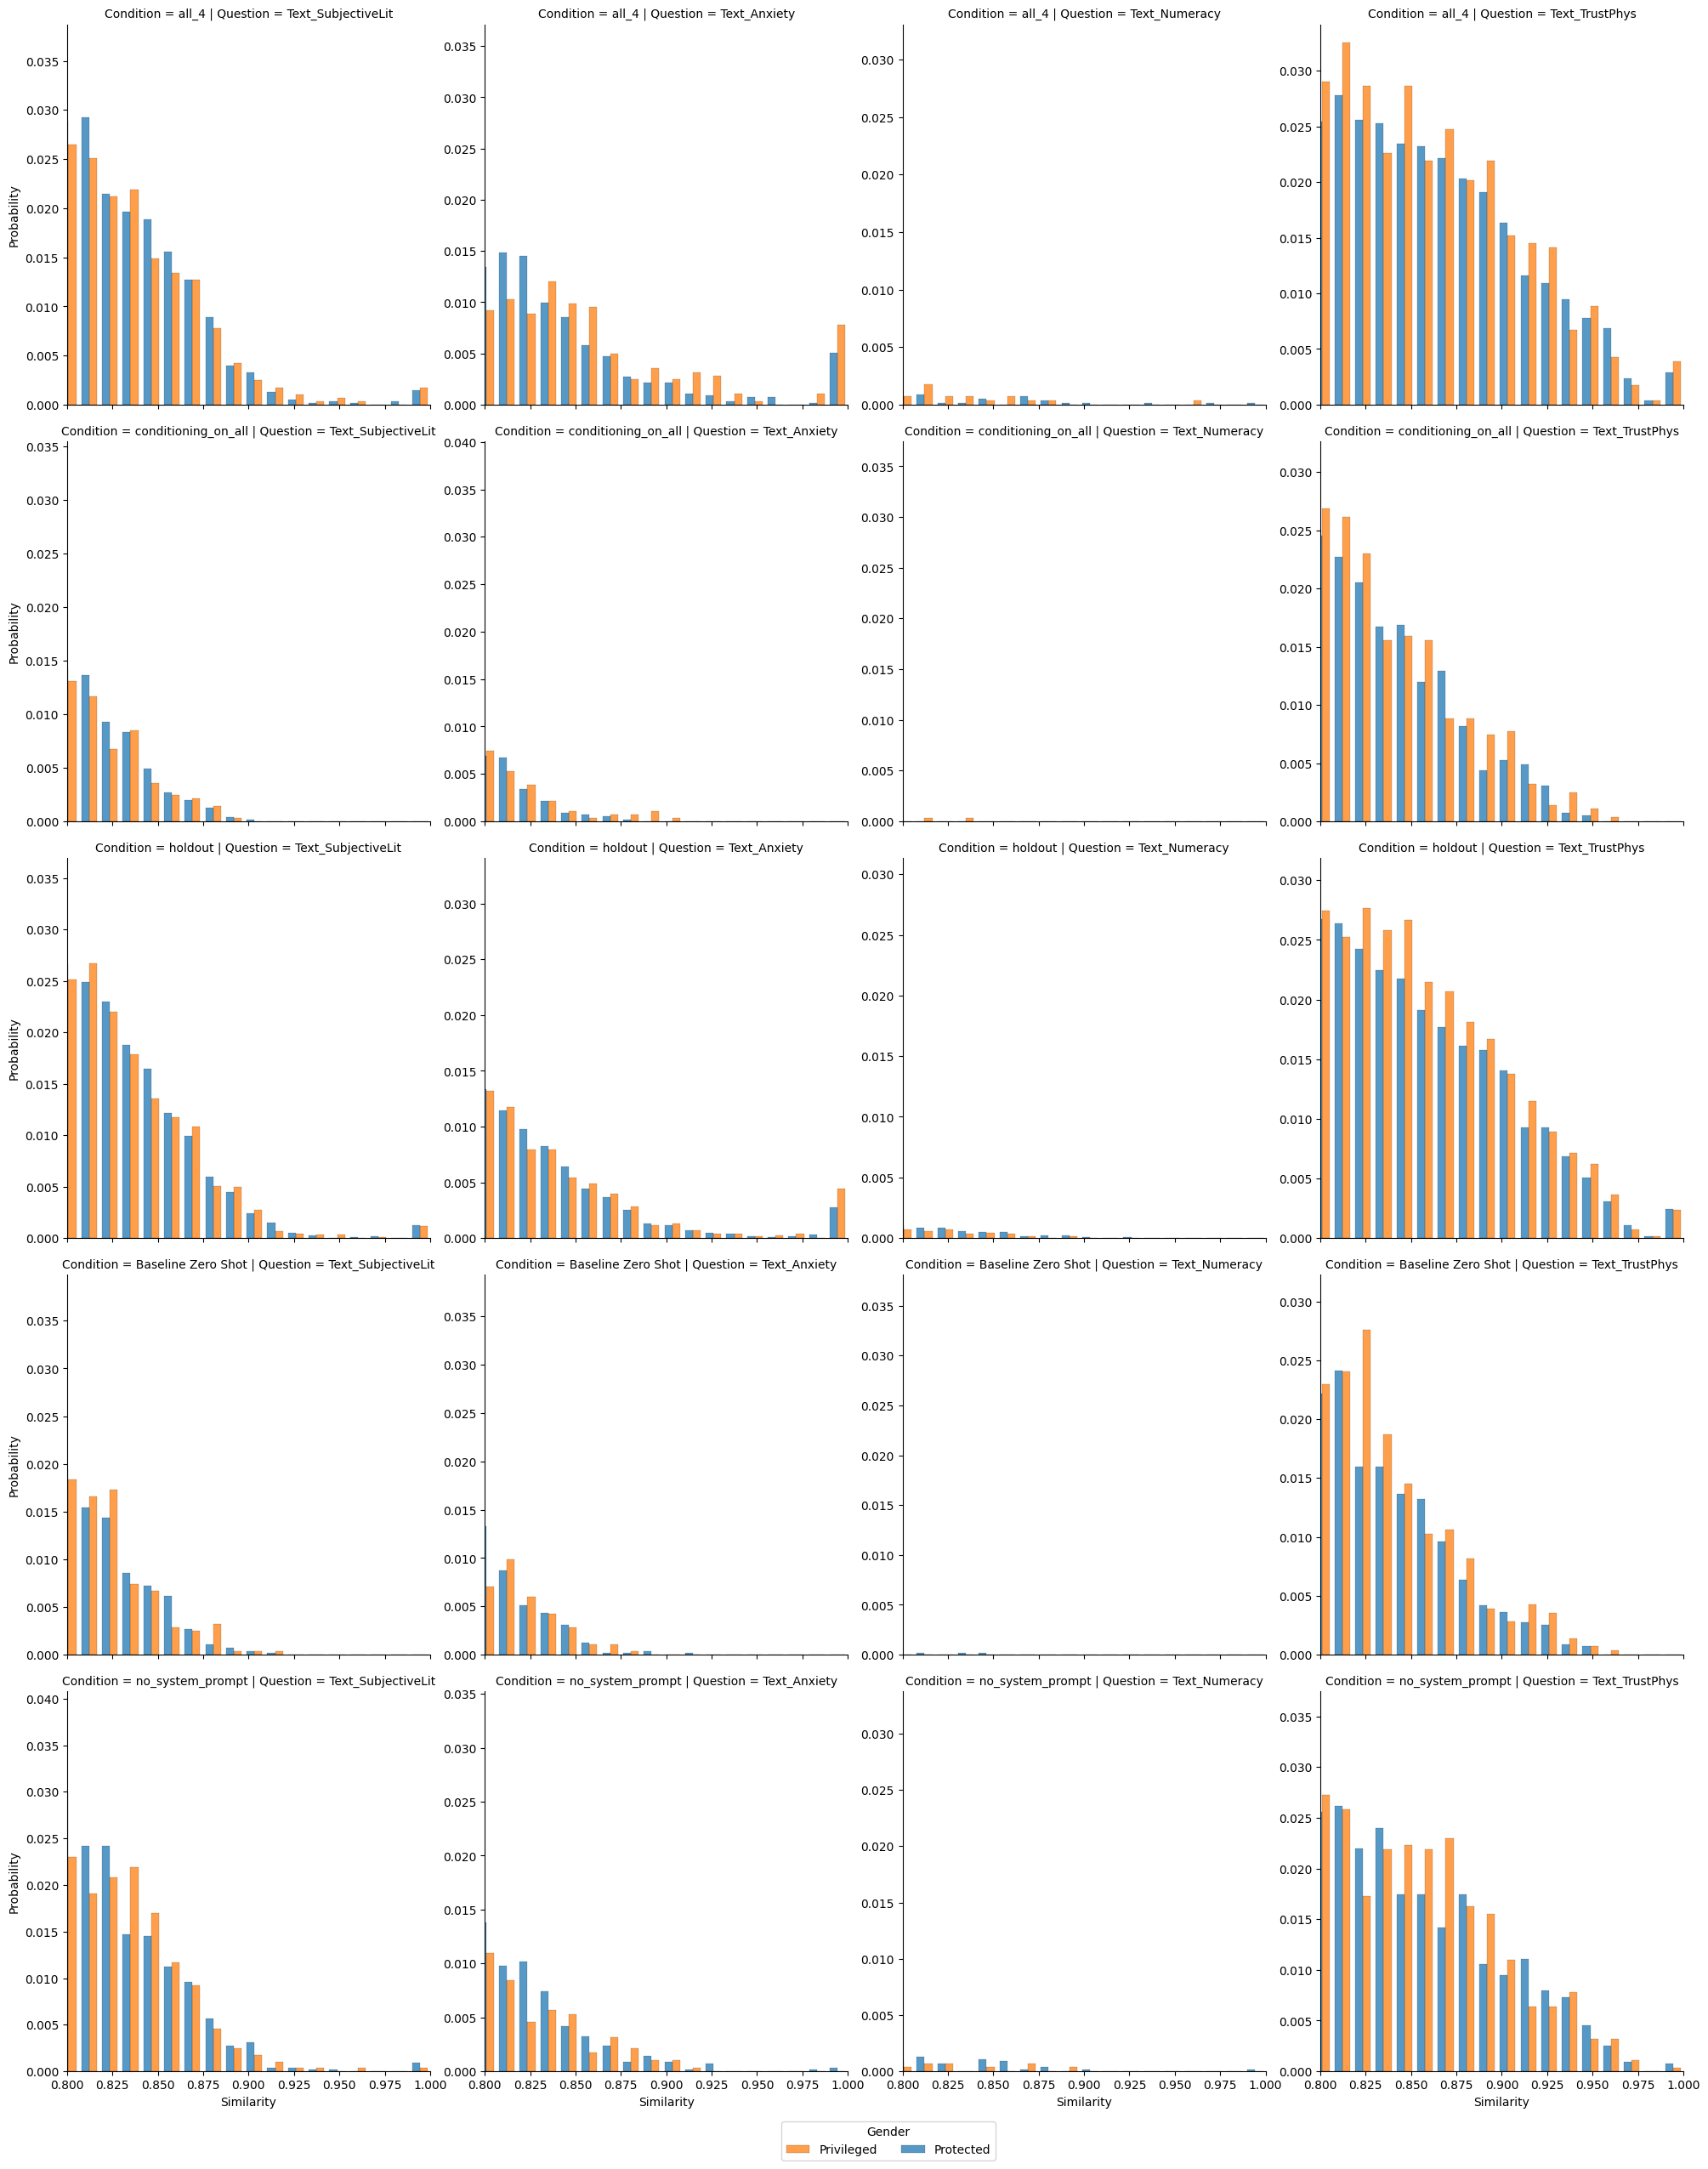

In [18]:

sns.displot(
    D, x="Similarity", hue="Gender", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Gender', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


/tmp/ipykernel_1787036/3362441973.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Education', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


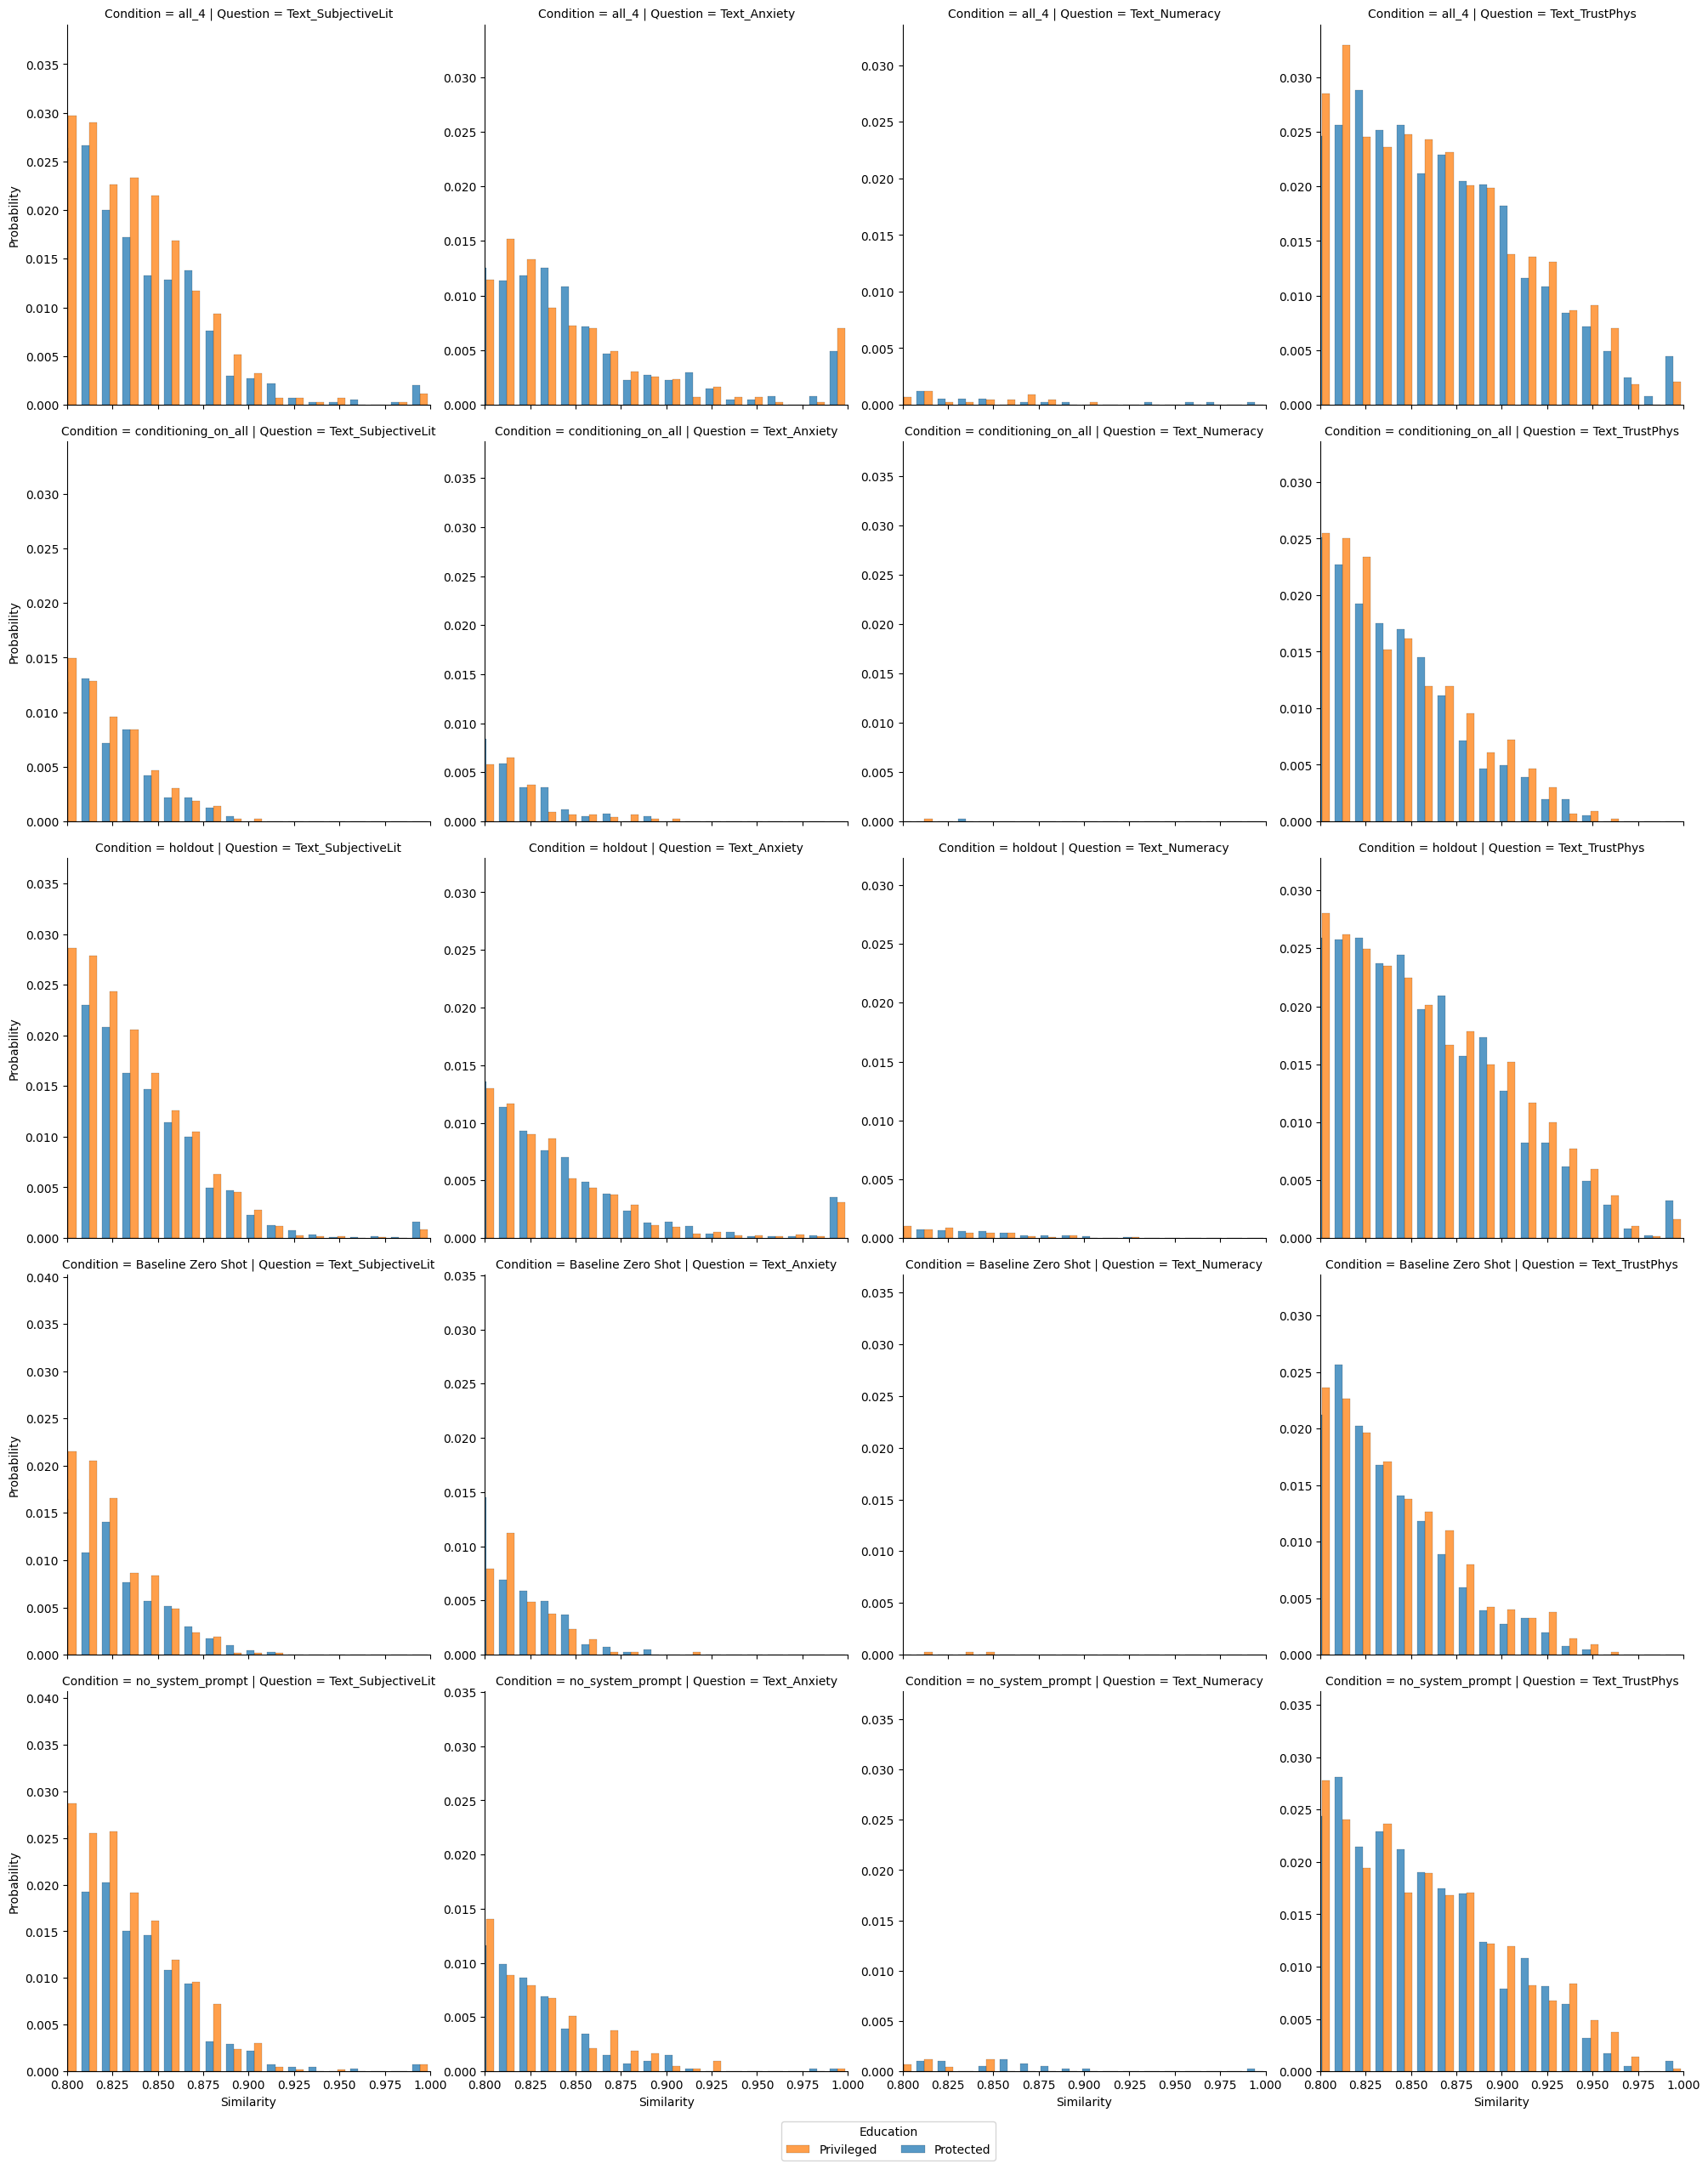

In [19]:

sns.displot(
    D, x="Similarity", hue="Education", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Education', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


/tmp/ipykernel_1787036/579777826.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Income', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


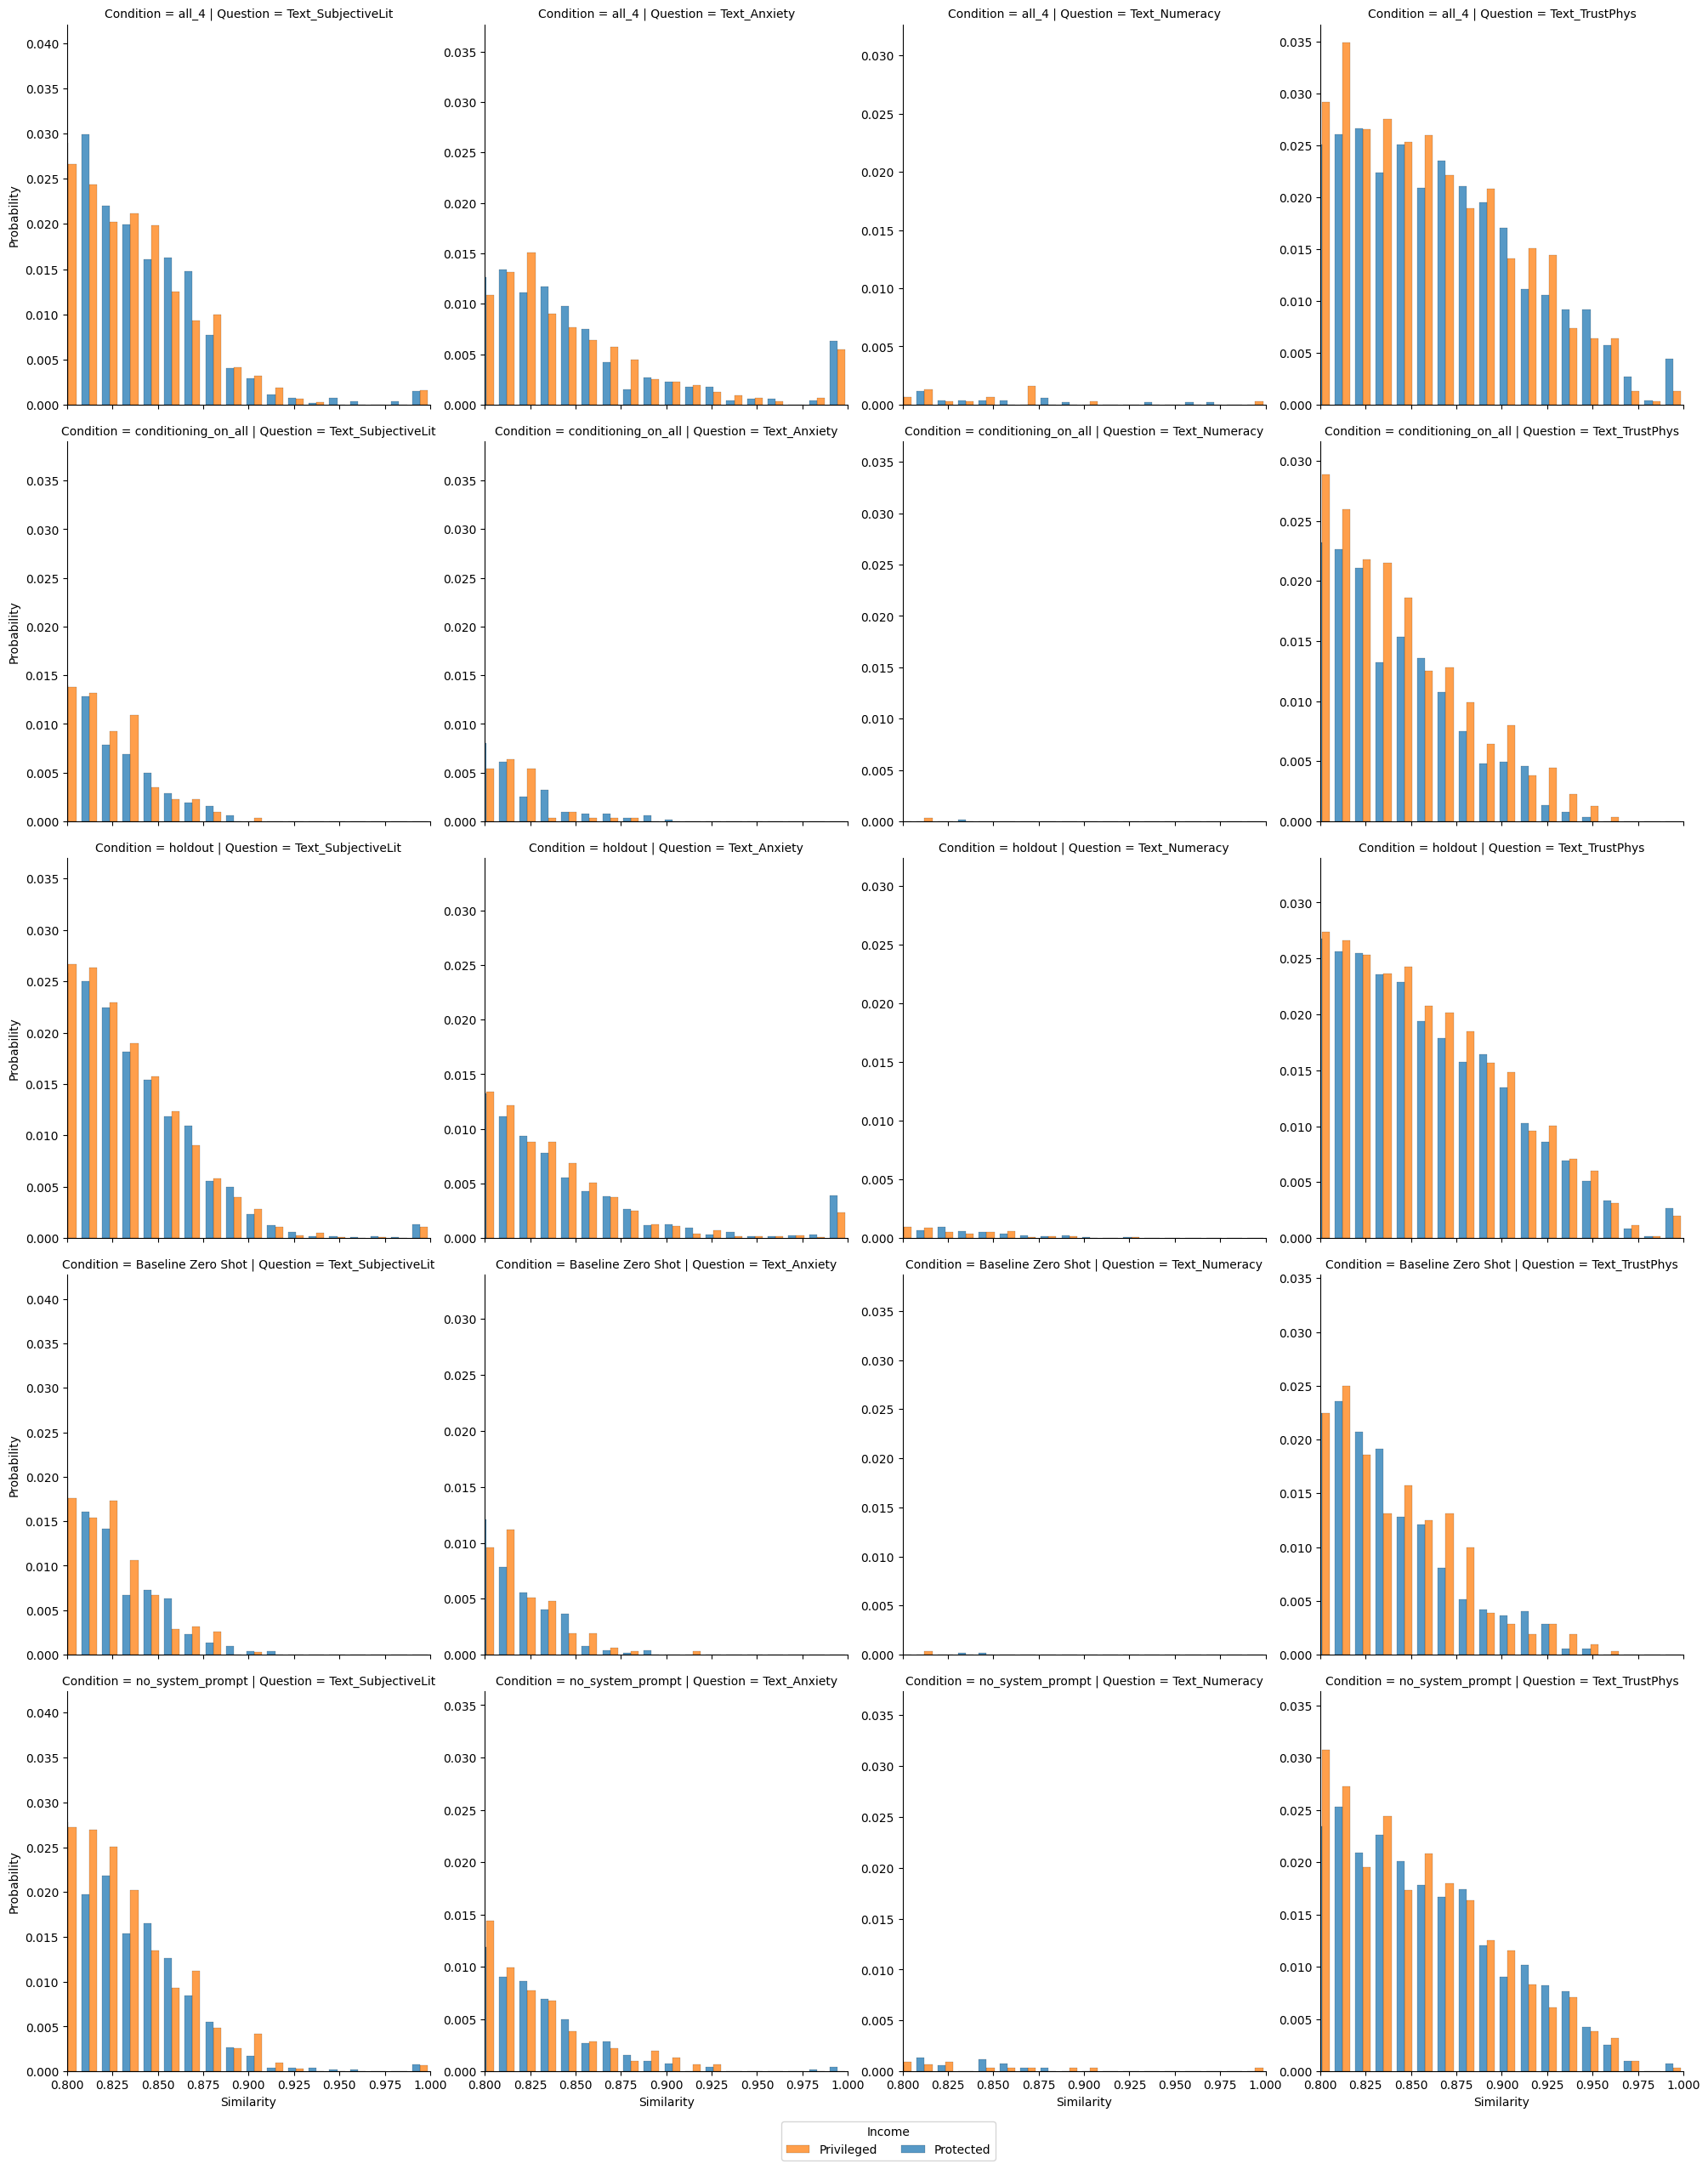

In [20]:

sns.displot(
    D, x="Similarity", hue="Income", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Income', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)
